# 2. Score Iris categorization algorithm

## Context

Working through using training/test splitting of the dataset to evluate the simple k-nearest neighbors predictive algorithm code I wrote earlier.

## Work outline

I am following the tutorial found at [this_site](https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/) and walking through a simple example of predicting iris species using the well known [iris_petal_dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data).

### Steps

1. import module from local filepath; load local data file
2. split the dataset into training and test populations
3. run predict_category_from_knn on test set to generate predictions
4. find score for algorithm
5. scale datasets by both range normalization and standardization
6. run algorithm with scaled features and score new predictions


## Result

The feature-scaled versions of the algorithm scored worse than the raw knn. This is interesting. Makes me more interested in optimizing a model on scaled features with distance weights per feature. This will be crucial for having a working knn regression for price prediction.

## Next steps

Next will incorporate a feature weighting parameter. As part of this workflow will need to divide 90 : 30 : 30, training : validation : test datasets to use to optimize feature weights.

Will also take "on the fly" functions defined in this workflow and incorporate them into the module.

Later will build on "scratch implementation" to extend to predicting a continuous variable output

## 1. import module from local filepath; load local data file

Also cleanup the dataset to prepare for applying functions


In [6]:
import csv
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np

from knn_base import euclidean_distance
from knn_base import find_k_neighbors
from knn_base import predict_category_from_knn

In [7]:
# load raw dataset
with open('data/iris_data.csv', 'r') as f:
    lines = csv.reader(f)
    dataset = list(lines)

In [8]:
# convert the category variable to integer to enable numpy array loading
iris_species_key = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}

In [9]:
cleaned_dataset = []
for row in dataset:
    new_row = []
    for i in range(len(row)):
        if i < 4:
            new_row.append(float(row[i]))
        else:
            new_row.append(iris_species_key[row[i]])
    cleaned_dataset.append(new_row)

In [10]:
cleaned_dataset[:5]

[[5.1, 3.5, 1.4, 0.2, 0],
 [4.9, 3.0, 1.4, 0.2, 0],
 [4.7, 3.2, 1.3, 0.2, 0],
 [4.6, 3.1, 1.5, 0.2, 0],
 [5.0, 3.6, 1.4, 0.2, 0]]

In [11]:
dataset_array = np.array(cleaned_dataset, dtype=float)

In [12]:
dataset_array[:5]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ]])

## 2. split the dataset into training and test populations

using element indices of the numpy array to simplify randomly splitting the dataset to training and test sets

In [13]:
dataset_array.size

750

In [14]:
dataset_array.shape

(150, 5)

In [20]:
np.ones(4).ndim

1

In [21]:
np.zeros(2).ndim

1

In [23]:
np.concatenate((np.ones(4), np.zeros(2)), 0)

array([1., 1., 1., 1., 0., 0.])

In [28]:
# for a 1/3 : 2/3 split I'm using a shuffled list
# of 100 ones and 50 zeros
split_array = np.concatenate((np.ones(100), np.zeros(50)), 0)
np.random.shuffle(split_array)

In [29]:
split_array[:5]

array([0., 0., 1., 1., 1.])

In [30]:
Counter(split_array[:])

Counter({0.0: 50, 1.0: 100})

In [31]:
Counter(split_array[:100])

Counter({0.0: 30, 1.0: 70})

In [32]:
Counter(split_array[:30])

Counter({0.0: 7, 1.0: 23})

In [33]:
np.where(split_array[:5])

(array([2, 3, 4]),)

In [34]:
split_indices = np.where(split_array)

In [36]:
training_set_array = dataset_array[split_indices]

In [37]:
training_set_array[:3]

array([[4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ]])

In [38]:
test_indices = np.where(split_array == 0)

In [40]:
test_set_array = dataset_array[test_indices]

In [41]:
test_set_array[:2]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ]])

## 3. run predict_category_from_knn on test set to generate predictions

Run `predict_category_from_knn` for each row in the test set in a loop. Take the list of predictions and compare to the actual identified species key.

In [42]:
predict_category_from_knn(test_set_array[0], training_set_array, 4, 4)

[[0.0, 4]]

In [43]:
test_set_predictions = []
for row in test_set_array:
    predictions = predict_category_from_knn(row, training_set_array, 4, 4)
    prediction = predictions[0][0]
    test_set_predictions.append(prediction)

In [44]:
test_set_predictions[:3]

[0.0, 0.0, 0.0]

## 4. find score for algorithm

Use an element-wise comparison between the prediction and actual arrays

In [45]:
# this is the wrong way to do it
accuracy_array = np.array(test_set_predictions) == training_set_array[:, 4]

/home/siddiqui/Projects/venvs/knn_tutorial/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


In [46]:
np.array([1, 2, 3, 4]) == np.array([1, 2, 0, 4])

array([ True,  True, False,  True])

In [47]:
accuracy_array[:5]

TypeError: 'bool' object has no attribute '__getitem__'

In [48]:
accuracy_array

False

In [50]:
accuracy_array = np.equal(test_set_predictions, test_set_array[:, 4])

In [51]:
Counter(accuracy_array)

Counter({False: 4, True: 46})

In [53]:
accuracy_score = float(Counter(accuracy_array)[True])/len(test_set_predictions)

In [54]:
accuracy_score

0.92

## 5. scale features in dataset

First will re-scale the features to make modified datasets. Will try both normalized and standardized feature scaling.


In [56]:
print dataset_array[:, 0].max()
print dataset_array[:, 0].min()
print dataset_array[:, 0].mean()
print dataset_array[:, 0].std()

7.9
4.3
5.843333333333334
0.8253012917851409


(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <a list of 10 Patch objects>)

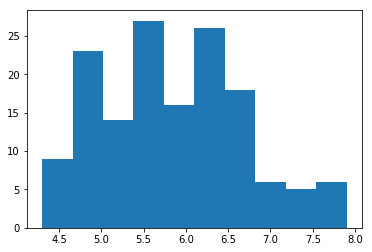

In [57]:
plt.hist(dataset_array[:, 0])

In [62]:
features_less_min = dataset_array[:, :4] - dataset_array[:, :4].min(axis=0)

In [63]:
dataset_array[:, :4].min(axis=0)

array([4.3, 2. , 1. , 0.1])

In [64]:
features_less_min[:5]

array([[0.8, 1.5, 0.4, 0.1],
       [0.6, 1. , 0.4, 0.1],
       [0.4, 1.2, 0.3, 0.1],
       [0.3, 1.1, 0.5, 0.1],
       [0.7, 1.6, 0.4, 0.1]])

In [65]:
dataset_array[:, :4].max(axis=0)

array([7.9, 4.4, 6.9, 2.5])

In [66]:
dataset_array[:, :4].max(axis=0) - dataset_array[:, :4].min(axis=0)

array([3.6, 2.4, 5.9, 2.4])

In [67]:
norm_range = dataset_array[:, :4].max(axis=0) - dataset_array[:, :4].min(axis=0)

In [68]:
normed_dataset = features_less_min / norm_range

In [69]:
normed_dataset[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

(array([ 9., 23., 14., 27., 22., 20., 18.,  6.,  5.,  6.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

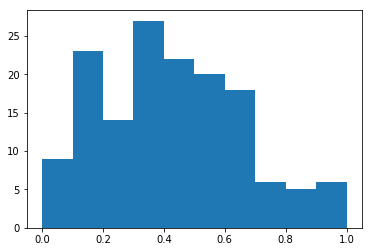

In [73]:
plt.hist(normed_dataset[:, 0])

In [82]:
dataset_array[4:].ndim

2

In [83]:
normed_dataset.ndim

2

In [84]:
dataset_array[4:].shape

(146, 5)

In [85]:
dataset_array[:5]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ]])

In [86]:
dataset_array[:, 4:].shape

(150, 1)

In [88]:
np.concatenate((normed_dataset, dataset_array[:, 4:]), axis=1)[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667, 0.        ],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667, 0.        ],
       [0.11111111, 0.5       , 0.05084746, 0.04166667, 0.        ],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667, 0.        ],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667, 0.        ]])

In [100]:
def norm_dataset(dataset, vector_length):
    """normalize features in dataset
    """
    norm_range = dataset[:, :vector_length].max(axis=0) - dataset[:, :vector_length].min(axis=0)
    features_less_min = dataset[:, :vector_length] - dataset[:, :vector_length].min(axis=0)
    normed_features = features_less_min / norm_range
    return np.concatenate((normed_features, dataset[:, vector_length:]), axis=1)

In [94]:
test_func = norm_dataset(dataset_array, 4)

In [95]:
test_func[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667, 0.        ],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667, 0.        ],
       [0.11111111, 0.5       , 0.05084746, 0.04166667, 0.        ],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667, 0.        ],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667, 0.        ]])

In [99]:
test_func == np.concatenate((normed_dataset, dataset_array[:, 4:]), axis=1)

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  Tr

In [101]:
def standardize_dataset(dataset, vector_length):
    """standardizes features in dataset
    """
    features_less_mean = dataset[:, :vector_length] - dataset[:, :vector_length].mean(axis=0)
    standardized_features = features_less_mean / dataset[:, :vector_length].std(axis=0)
    return np.concatenate((standardized_features, dataset[:, vector_length:]), axis=1)

In [102]:
test_stdize_func = standardize_dataset(dataset_array, 4)

In [103]:
test_stdize_func[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673,  0.        ],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673,  0.        ],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673,  0.        ],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673,  0.        ],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673,  0.        ]])

(array([ 9., 23., 14., 27., 22., 20., 18.,  6.,  5.,  6.]),
 array([-1.87002413, -1.4338198 , -0.99761547, -0.56141113, -0.1252068 ,
         0.31099753,  0.74720187,  1.1834062 ,  1.61961053,  2.05581487,
         2.4920192 ]),
 <a list of 10 Patch objects>)

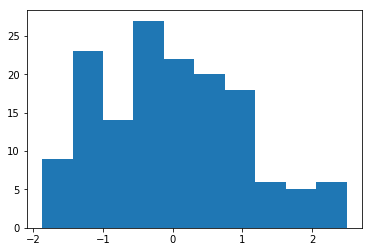

In [104]:
plt.hist(test_stdize_func[:, 0])

## 6. run algorithm with scaled features and score new predictions

Re-running the naive algorithm with the same process as above.

In [105]:
normed_training_set_array = test_func[split_indices]

In [106]:
stdized_training_set_array = test_stdize_func[split_indices]

In [107]:
normed_test_set_array = test_func[test_indices]

In [108]:
stdized_test_set_array = test_stdize_func[test_indices]

In [109]:
# roll-up predictions function
def generate_knn_predictions_from_set(test_set, training_set, k, vector_length):
    """loop over the test set and generate predictions for each feature row"""
    test_set_predictions = []
    for row in test_set:
        predictions = predict_category_from_knn(row, training_set, k, vector_length)
        prediction = predictions[0][0]
        test_set_predictions.append(prediction)
    return test_set_predictions

In [110]:
normed_test_predictions = generate_knn_predictions_from_set(
    normed_test_set_array,
    normed_training_set_array,
    4,
    4
)

In [111]:
stdized_test_predictions = generate_knn_predictions_from_set(
    stdized_test_set_array,
    stdized_training_set_array,
    4,
    4
)

In [112]:
def score_prediction_algorithm(test_predictions, test_dataset, category_index):
    """returns accuracy score from a list of predictions and an array of test data
    """
    accuracy_array = np.equal(
        test_predictions, test_dataset[:, category_index]
    )
    count_accurate_predictions = Counter(accuracy_array)
    accuracy_score = float(count_accurate_predictions[True])/len(test_predictions)
    return accuracy_score

In [113]:
score_prediction_algorithm(normed_test_predictions, normed_test_set_array, 4)

0.88

In [114]:
score_prediction_algorithm(stdized_test_predictions, stdized_test_set_array, 4)

0.88

In [ ]:
# funny the feature scaling lead to worse scores